In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import convolution
import detect_edges

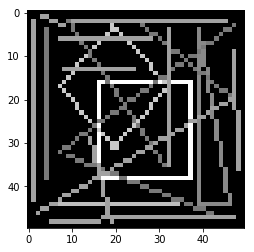

In [3]:
N = 3
K = np.ones((N,N))/(N*N)
img = plt.imread("mini_shapes.png")
gray = img.sum(axis=2)
nRows = gray.shape[0]
nCols = gray.shape[1]
plt.imshow(gray,cmap="gray")

### Testing the convolution on an averaging filter

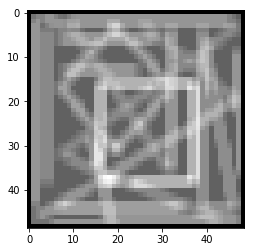

In [4]:
blur = convolution.convolution(gray, K)
plt.imshow(blur, cmap='gray')

### Testing the convolution with a sobel kernel for edge detection

In [6]:
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_vertical = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
sobel = sobel_horizontal + sobel_vertical


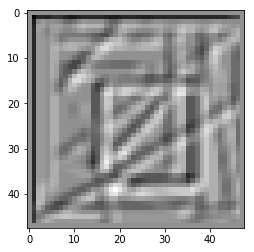

In [8]:
img_sobel = convolution.convolution(blur, sobel)
plt.imshow(img_sobel, cmap='gray')

CPU times: user 8.87 s, sys: 0 ns, total: 8.87 s
Wall time: 8.88 s
CPU times: user 8.96 s, sys: 0 ns, total: 8.96 s
Wall time: 8.97 s


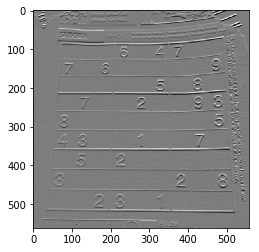

In [16]:
%time img_sobel_h = convolution.convolution(gray, sobel_horizontal)
%time img_sobel_v = convolution.convolution(gray, sobel_vertical)

plt.imshow(img_sobel_h, cmap='gray')

In [152]:
# numpy idiomatic version
gray = np.ascontiguousarray(gray)
%time tmph_1 = convolution.convolution_np(gray, sobel_horizontal, einstein=True)
%time tmph_2 = convolution.convolution_np(gray, sobel_horizontal)

np.allclose(tmph_1, tmph_2)

CPU times: user 946 ms, sys: 6.52 ms, total: 953 ms
Wall time: 953 ms
CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 18.3 ms


True

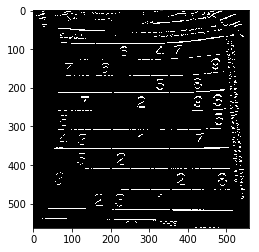

In [154]:
plt.imshow((tmph_2 > 1) * 1, cmap='gray')

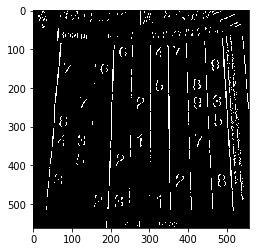

In [6]:
# Plot the image after applying vertical sobel
b_img_sobel_v = (img_sobel_v > 1) * 1
plt.imshow(b_img_sobel_v, cmap='gray')

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

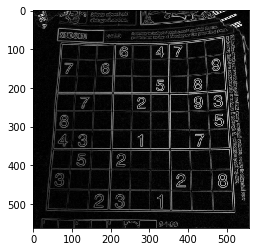

In [11]:
# Plot the image after applying soble vertically and horizontally

img_sobel = abs(1/np.sqrt(2)) * np.sqrt( (img_sobel_v)**2 + (img_sobel_h)**2 )
plt.imshow(img_sobel, cmap='gray')
sobel

# Use convolution separable

CPU times: user 3.22 s, sys: 4.29 ms, total: 3.22 s
Wall time: 3.22 s


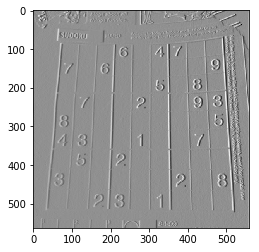

In [4]:
sobel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

flattened = gray.flatten()

%time out = convolution.convolution_separable(flattened, sobel)

out = out.reshape((nRows, nCols))
plt.imshow(out,cmap='gray')

In [7]:
# numpy idiomatic version
%time tmp1 = convolution.convolution_separable_np(flattened, sobel, einstein=True)
%time tmp2 = convolution.convolution_separable_np(flattened, sobel)

np.allclose(tmp2,tmp1), np.allclose(tmp2, out.flatten())

CPU times: user 1.5 s, sys: 6.22 ms, total: 1.5 s
Wall time: 1.51 s
CPU times: user 7.8 ms, sys: 0 ns, total: 7.8 ms
Wall time: 7.4 ms


(True, True)

In [13]:
U,S,V = np.linalg.svd(sobel)
print(U)
print(V.T)
V.T

[[-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]]
[[-0.40824829  0.          0.91287093]
 [-0.81649658 -0.4472136  -0.36514837]
 [-0.40824829  0.89442719 -0.18257419]]


array([[-0.40824829,  0.        ,  0.91287093],
       [-0.81649658, -0.4472136 , -0.36514837],
       [-0.40824829,  0.89442719, -0.18257419]])

# Test edge detection function

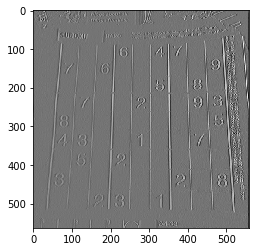

In [14]:
edge_sobel_img = detect_edges.detect_edges_sobel(gray)
edge_sobel_img *= 255.0/edge_sobel_img.max()  
plt.imshow(edge_sobel_img,cmap='gray')